# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [20]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
df=pd.DataFrame({"City":cities})
df["Cloudiness"]=''
df['Country']=''
df['Date']=''
df['Humidity']=''
df['Lat']=''
df['Lng']=''
df['Max_Temp']=''
df['Wind_Speed']=''
n=0
s=1
print("Beginning Data Retrieval")
print("-------------------------------")
for index,row in df.iterrows():
    query_url = url + "appid=" + api_key + "&q=" + row["City"]
    response=requests.get(query_url).json()
    if n<50:
        n=n+1
    else:
        s=s+1
        n=1
    try:
        print(f'Processing Record {n} of Set {s} | {row["City"]}')
        df.loc[index,"Cloudiness"]=response['clouds']['all']
        df.loc[index,'Country']=response['sys']['country']
        df.loc[index,'Date']=response['dt']
        df.loc[index,'Humidity']=response['main']['humidity']
        df.loc[index,'Lat']=response['coord']['lat']
        df.loc[index,'Lng']=response['coord']['lon']
        df.loc[index,'Max_Temp']=response['main']['temp_max']
        df.loc[index,'Wind_Speed']=response['wind']['speed'] 
    except (KeyError):
        print("City information not found. Skipping...")
    
        
        

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | alotau
City information not found. Skipping...
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | faanui
Processing Record 4 of Set 1 | yaan
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | tarudant
City information not found. Skipping...
Processing Record 7 of Set 1 | tuatapere
Processing Record 8 of Set 1 | berlevag
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | bluff
Processing Record 11 of Set 1 | dunedin
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | hobyo
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | amuntai
Processing Record 18 of Set 1 | waingapu
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | saint-philippe
Processing Record 21 of Set 1 | tasiilaq
Processing Record

Processing Record 30 of Set 4 | baruun-urt
Processing Record 31 of Set 4 | saint anthony
Processing Record 32 of Set 4 | kavaratti
Processing Record 33 of Set 4 | khani
Processing Record 34 of Set 4 | maloy
Processing Record 35 of Set 4 | rawson
Processing Record 36 of Set 4 | abalak
Processing Record 37 of Set 4 | anadyr
Processing Record 38 of Set 4 | saleaula
City information not found. Skipping...
Processing Record 39 of Set 4 | kibre mengist
Processing Record 40 of Set 4 | port keats
Processing Record 41 of Set 4 | casino
Processing Record 42 of Set 4 | viedma
Processing Record 43 of Set 4 | turukhansk
Processing Record 44 of Set 4 | xichang
Processing Record 45 of Set 4 | marawi
Processing Record 46 of Set 4 | mitu
Processing Record 47 of Set 4 | mys shmidta
City information not found. Skipping...
Processing Record 48 of Set 4 | piacabucu
Processing Record 49 of Set 4 | adre
Processing Record 50 of Set 4 | jalu
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | 

Processing Record 8 of Set 8 | port hardy
Processing Record 9 of Set 8 | vao
Processing Record 10 of Set 8 | port hedland
Processing Record 11 of Set 8 | lolua
City information not found. Skipping...
Processing Record 12 of Set 8 | fort nelson
Processing Record 13 of Set 8 | goryachiy klyuch
Processing Record 14 of Set 8 | samusu
City information not found. Skipping...
Processing Record 15 of Set 8 | angatuba
Processing Record 16 of Set 8 | flin flon
Processing Record 17 of Set 8 | ketchikan
Processing Record 18 of Set 8 | camalu
Processing Record 19 of Set 8 | kashi
City information not found. Skipping...
Processing Record 20 of Set 8 | karratha
Processing Record 21 of Set 8 | westport
Processing Record 22 of Set 8 | nanakuli
Processing Record 23 of Set 8 | takoradi
Processing Record 24 of Set 8 | tiksi
Processing Record 25 of Set 8 | naron
Processing Record 26 of Set 8 | bagotville
Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | maniitsoq
Processing Record 

Processing Record 35 of Set 11 | meyungs
City information not found. Skipping...
Processing Record 36 of Set 11 | tazovskiy
Processing Record 37 of Set 11 | nandu
Processing Record 38 of Set 11 | bentiu
City information not found. Skipping...
Processing Record 39 of Set 11 | fairbanks
Processing Record 40 of Set 11 | sorong
Processing Record 41 of Set 11 | ixtapa
Processing Record 42 of Set 11 | lucea
Processing Record 43 of Set 11 | mangile
City information not found. Skipping...
Processing Record 44 of Set 11 | pangkalanbuun
Processing Record 45 of Set 11 | black river
Processing Record 46 of Set 11 | cabimas
Processing Record 47 of Set 11 | aksay
Processing Record 48 of Set 11 | valdivia
Processing Record 49 of Set 11 | safford
Processing Record 50 of Set 11 | las rozas de madrid
Processing Record 1 of Set 12 | attawapiskat
City information not found. Skipping...
Processing Record 2 of Set 12 | dargaville
Processing Record 3 of Set 12 | kazalinsk
City information not found. Skipping

In [5]:
df.count()

City          624
Cloudiness    624
Country       624
Date          624
Humidity      624
Lat           624
Lng           624
Max_Temp      624
Wind_Speed    624
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
df.to_csv("output_data_file",index=False)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
0,alotau,,,,,,,,
1,kapaa,75,US,1569265035,88,22.08,-159.32,84.2,6.93
2,faanui,12,PF,1569265153,82,-16.48,-151.75,79.85,12.95
3,yaan,84,NG,1569265153,94,7.38,8.57,75.35,18.57
4,mataura,76,NZ,1569265154,92,-46.19,168.86,43,5.01


In [7]:
file=pd.read_csv("output_data_file")
file.count()

City          624
Cloudiness    550
Country       546
Date          550
Humidity      550
Lat           550
Lng           550
Max_Temp      550
Wind_Speed    550
dtype: int64

In [8]:
file=file.dropna(how="any")

In [9]:
file.count()

City          546
Cloudiness    546
Country       546
Date          546
Humidity      546
Lat           546
Lng           546
Max_Temp      546
Wind_Speed    546
dtype: int64

In [10]:
file.head(10)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max_Temp,Wind_Speed
1,kapaa,75.0,US,1.569265e+09,88.0,22.08,-159.32,84.20,6.93
2,faanui,12.0,PF,1.569265e+09,82.0,-16.48,-151.75,79.85,12.95
3,yaan,84.0,NG,1.569265e+09,94.0,7.38,8.57,75.35,18.57
4,mataura,76.0,NZ,1.569265e+09,92.0,-46.19,168.86,43.00,5.01
6,tuatapere,100.0,NZ,1.569265e+09,92.0,-46.13,167.69,43.00,5.01
7,berlevag,75.0,NO,1.569265e+09,80.0,70.86,29.09,41.00,19.46
8,saint george,40.0,GR,1.569265e+09,73.0,39.45,22.34,69.80,8.05
9,bluff,99.0,AU,1.569265e+09,77.0,-23.58,149.07,62.93,2.21
10,dunedin,0.0,NZ,1.569265e+09,66.0,-45.87,170.50,45.00,4.00
11,hilo,90.0,US,1.569265e+09,83.0,19.71,-155.08,78.80,6.93


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

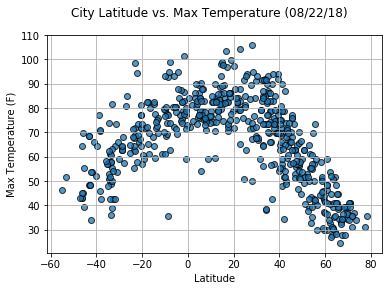

In [11]:
x_axis=file["Lat"]
y_axis=file["Max_Temp"]
fig,ax=plt.subplots()
ax.scatter(x_axis,y_axis,edgecolors="black",alpha=0.75)
fig.suptitle("City Latitude vs. Max Temperature (08/22/18)")
ax.set_ylabel("Max Temperature (F)")
ax.set_xlabel("Latitude")
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

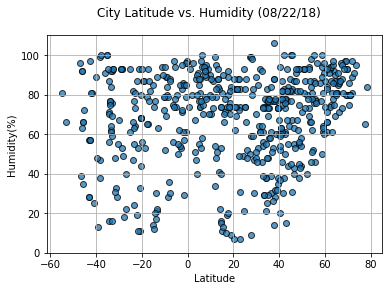

In [12]:
y_axis=file["Humidity"]
fig,ax=plt.subplots()
ax.scatter(x_axis,y_axis,edgecolor="black",alpha=0.75)
fig.suptitle("City Latitude vs. Humidity (08/22/18)")
ax.set_ylabel("Humidity(%)")
ax.set_xlabel("Latitude")
ax.set_ylim(0,110)
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

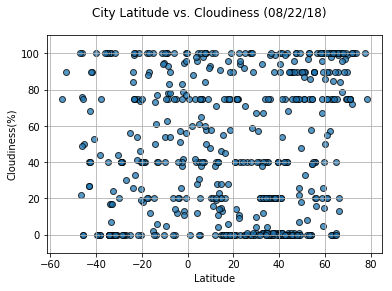

In [13]:
y_axis=file["Cloudiness"]
fig,ax=plt.subplots()
ax.scatter(x_axis,y_axis,edgecolor="black",alpha=0.75)
fig.suptitle("City Latitude vs. Cloudiness (08/22/18)")
ax.set_ylabel("Cloudiness(%)")
ax.set_xlabel("Latitude")
ax.set_ylim(-10,110)
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

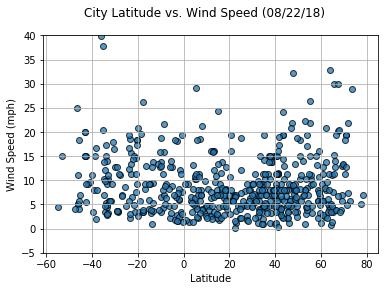

In [15]:
y_axis=file["Wind_Speed"]
fig,ax=plt.subplots()
plt.scatter(x_axis,y_axis,edgecolor="black",alpha=0.75)
fig.suptitle("City Latitude vs. Wind Speed (08/22/18)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlabel("Latitude")
ax.set_ylim(-5,40)
plt.grid()
plt.show()